# Customer Churn Analysis and Prediction
### Internship Project – SaiKet Systems
### Domain: Machine Learning

This project analyzes customer churn data from a telecommunications company and builds a predictive model to identify customers likely to churn.

Objectives:
- Perform data preprocessing
- Select important features
- Train machine learning models
- Evaluate model performance


# Logistic Regression

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
df = pd.read_csv("Customer_Churn_Analysis.csv")  # Make sure dataset is in same folder

# Display first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [4]:
# Numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Categorical columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Fill numeric with median
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical with mode
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

X.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [7]:
print(df['Churn'].isnull().sum())


0


In [8]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (5634, 20)
Testing Data Shape: (1409, 20)


In [9]:
X = df.drop(['customerID', 'Churn'], axis=1)  # adjust target column name
y = df['Churn']


In [10]:
X = pd.get_dummies(X, drop_first=True)


In [11]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns


In [14]:
print(type(X_train))
print(type(X_test))


<class 'pandas.DataFrame'>
<class 'pandas.DataFrame'>


In [15]:
print("Original df shape:", df.shape)
print("Columns:", df.columns)


Original df shape: (7043, 21)
Columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')


In [16]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

print("X shape:", X.shape)
print("y shape:", y.shape)
print(X.head())
print(y.head())


X shape: (7043, 19)
y shape: (7043,)
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-mont

In [17]:
from sklearn.model_selection import train_test_split

if X.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("Training Data Shape:", X_train.shape)
    print("Testing Data Shape:", X_test.shape)
else:
    print("Error: X is empty, cannot split!")


Training Data Shape: (5634, 19)
Testing Data Shape: (1409, 19)


In [18]:
df = df.dropna(subset=['Churn'])
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [ ]:
# Start from original cleaned dataframe
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

#  Split FIRST (while still DataFrame)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Define column types AFTER split
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Build preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

#  Fit ONLY on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)


In [20]:
df['Churn'] = df['Churn'].fillna(0)  # or use mode
# Or drop rows with missing target
df = df.dropna(subset=['Churn'])


Logistic Regression Accuracy: 0.7743080198722498

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409

Logistic Regression ROC-AUC: 0.8606661525562329


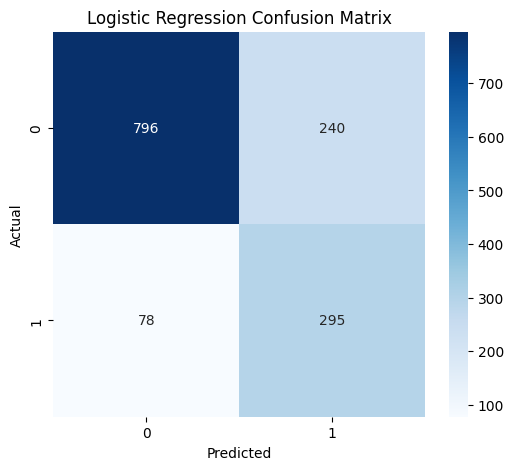

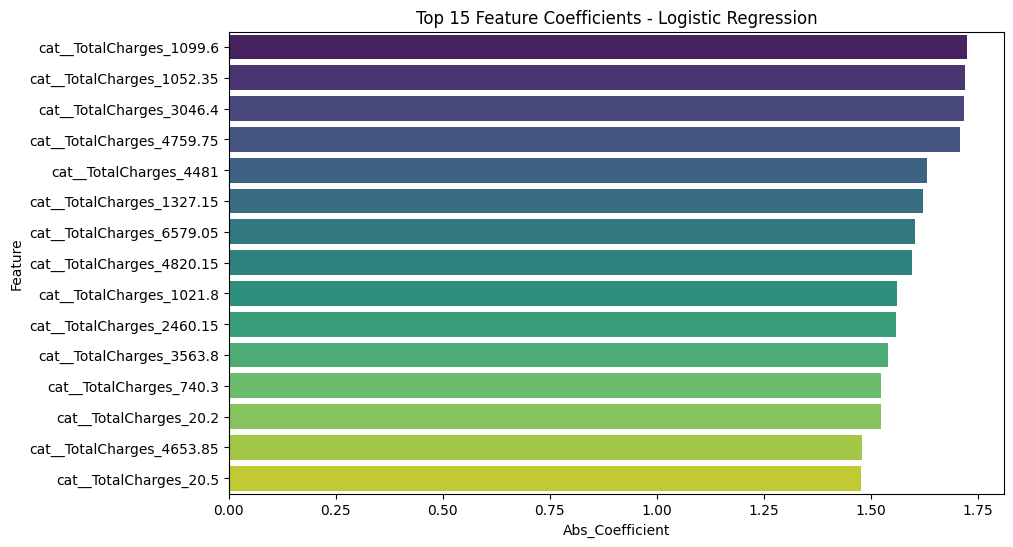

In [21]:
# -----------------------------
# Logistic Regression for Customer Churn
# -----------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Logistic Regression
lr_model = LogisticRegression(
    solver='liblinear',   # good for small to medium datasets
    penalty='l2',         # regularization
    class_weight='balanced',  # handle class imbalance
    random_state=42,
    max_iter=1000
)

# Fit model on preprocessed training data
lr_model.fit(X_train_processed, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_processed)
y_prob_lr = lr_model.predict_proba(X_test_processed)[:,1]

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print("Logistic Regression ROC-AUC:", roc_auc_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (Coefficients)
feature_names = preprocessor.get_feature_names_out()
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0]
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title("Top 15 Feature Coefficients - Logistic Regression")
plt.show()


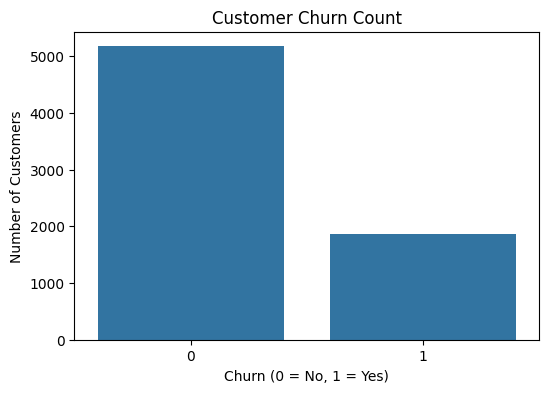

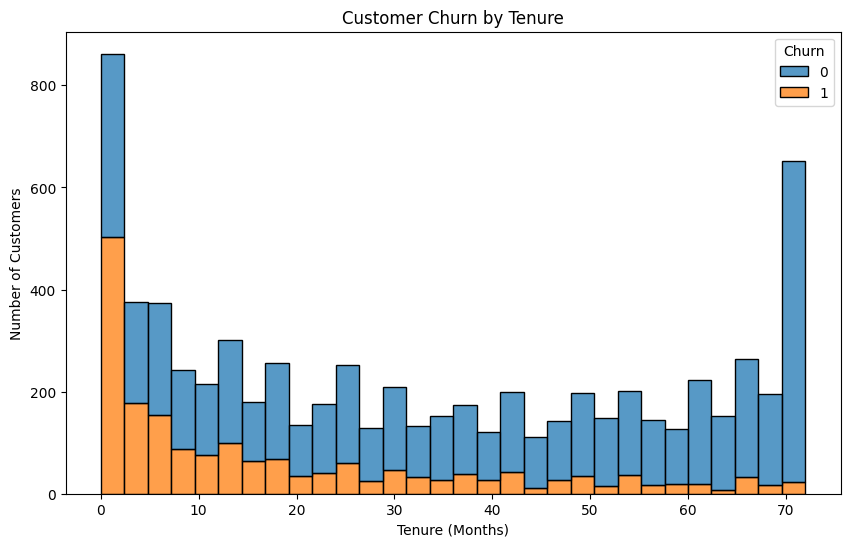

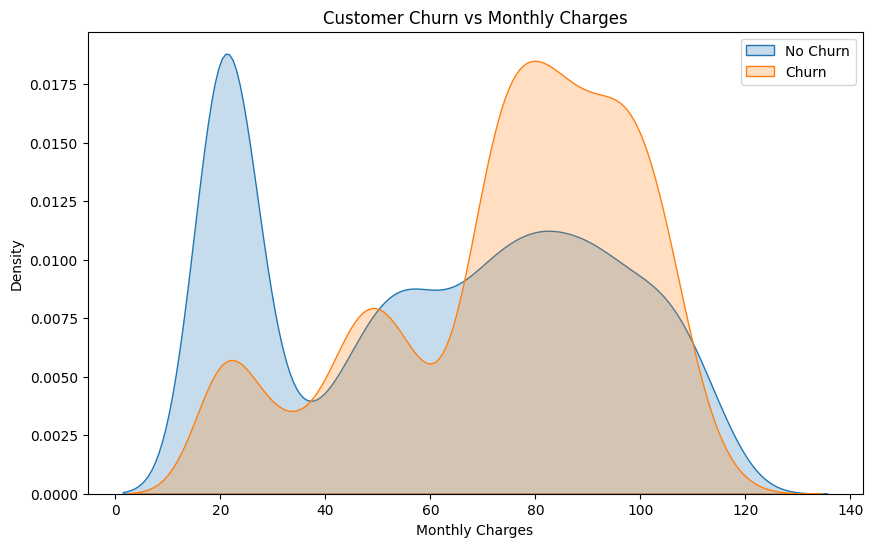

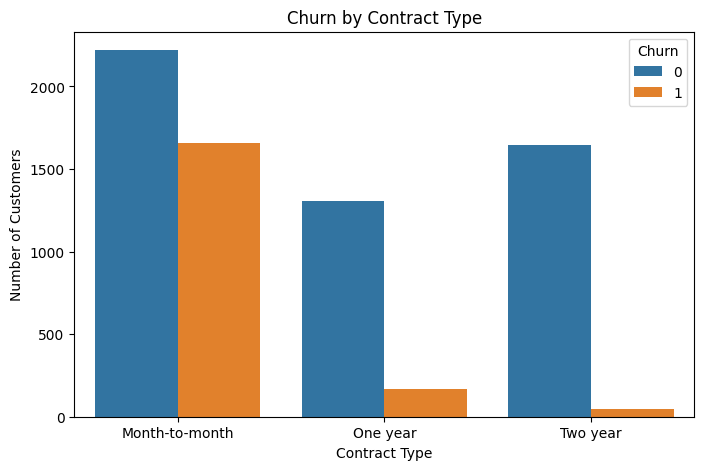

In [22]:

# Customer Churn Fluctuation Charts


import matplotlib.pyplot as plt
import seaborn as sns

# Churn Count
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Count')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

# Churn by Tenure
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Customer Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

# Churn vs Monthly Charges
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Churn']==0], x='MonthlyCharges', label='No Churn', fill=True)
sns.kdeplot(data=df[df['Churn']==1], x='MonthlyCharges', label='Churn', fill=True)
plt.title('Customer Churn vs Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

# Churn by Contract Type (if exists)
if 'Contract' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='Contract', hue='Churn', data=df)
    plt.title('Churn by Contract Type')
    plt.xlabel('Contract Type')
    plt.ylabel('Number of Customers')
    plt.show()


In [23]:
# Fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)  # must run successfully

# Transform test set
X_test_processed = preprocessor.transform(X_test)

# Predict probabilities for positive class
y_prob = model.predict_proba(X_test_processed)[:, 1]

# Compute ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8608369476331943


# Rondom Forest

Random Forest Accuracy: 0.7963094393186657

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Random Forest ROC-AUC: 0.8460204747068018


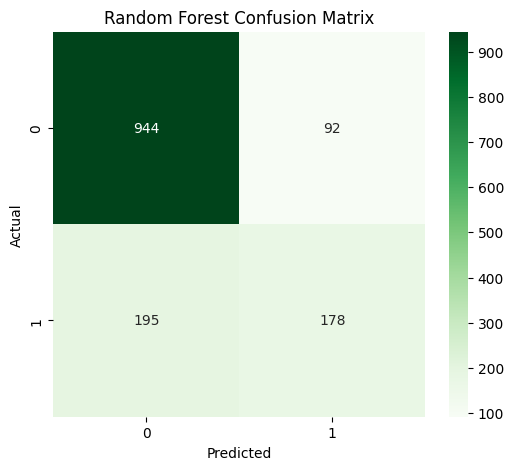

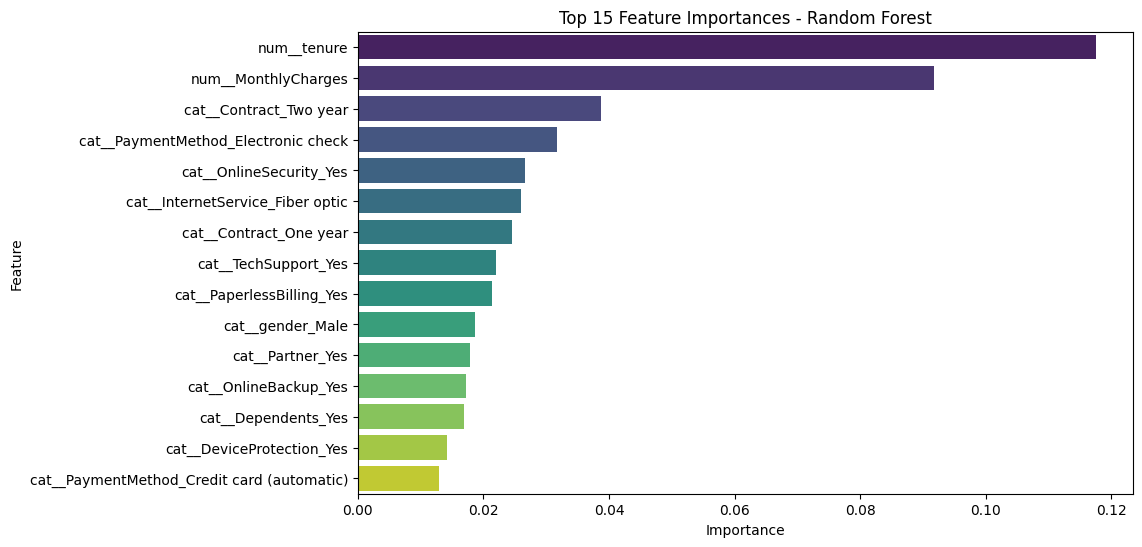

In [24]:
# -----------------------------
# Random Forest Classifier for Customer Churn
# -----------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

#  Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,           # let trees expand fully
    random_state=42,
    class_weight='balanced'   # handles class imbalance
)

#  Fit model on preprocessed training data
rf_model.fit(X_train_processed, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_processed)
y_prob_rf = rf_model.predict_proba(X_test_processed)[:,1]

#  Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Feature Importance 
importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()


# Decision Trees

Decision Tree Accuracy: 0.752306600425834

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      1036
           1       0.53      0.61      0.57       373

    accuracy                           0.75      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.75      0.76      1409

Decision Tree ROC-AUC: 0.7077644477108284


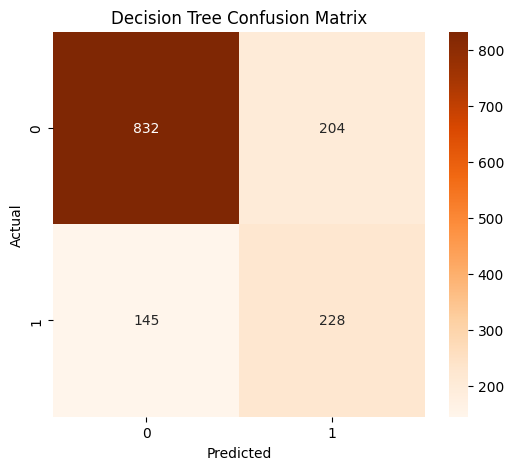

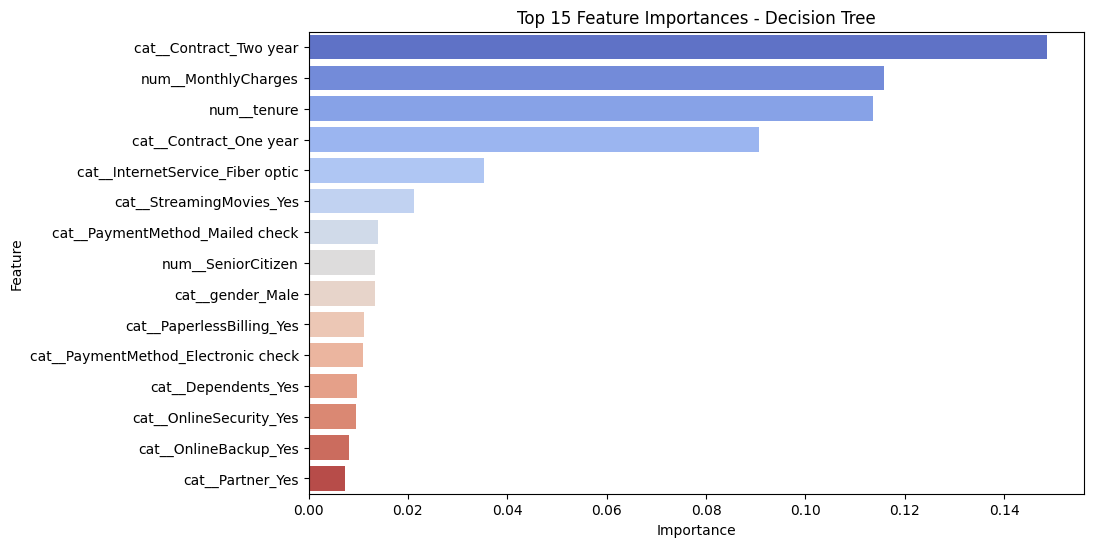

In [25]:
# -----------------------------
# Decision Tree Classifier for Customer Churn
# -----------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#  Initialize Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=None,        # None means expand until all leaves are pure
    min_samples_split=2,   # minimum samples to split a node
    random_state=42,
    class_weight='balanced' # handles class imbalance
)

#  Fit model on preprocessed training data
dt_model.fit(X_train_processed, y_train)

#  Predict on test data
y_pred_dt = dt_model.predict(X_test_processed)
y_prob_dt = dt_model.predict_proba(X_test_processed)[:,1]

#  Evaluate model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Decision Tree ROC-AUC:", roc_auc_dt)

#  Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Feature Importance (Optional)
importances = dt_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='coolwarm')
plt.title("Top 15 Feature Importances - Decision Tree")
plt.show()


 # Gradiant Boosting

Gradient Boosting Accuracy: 0.8140525195173882

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Gradient Boosting ROC-AUC: 0.8657084890328859


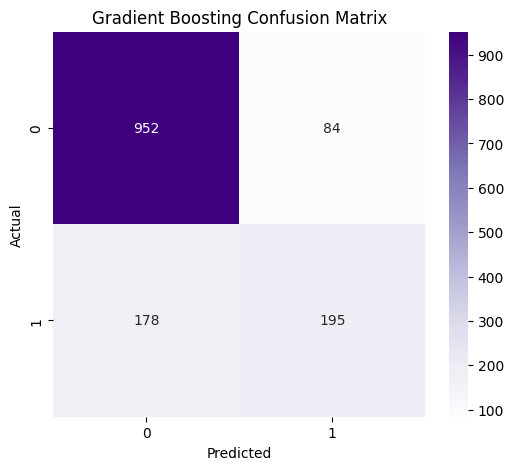

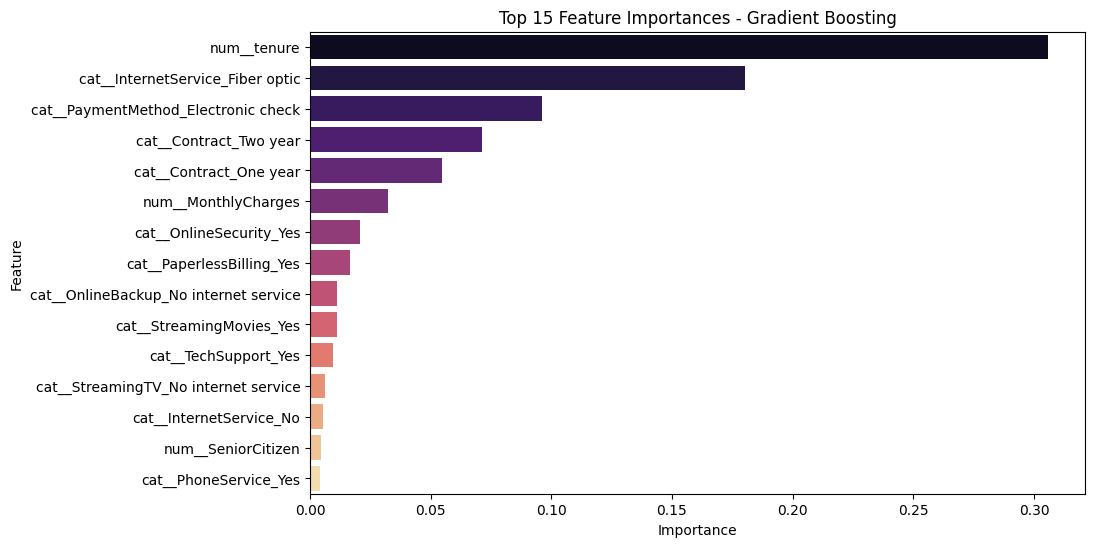

In [26]:
# -----------------------------
# Gradient Boosting Classifier for Customer Churn
# -----------------------------

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200,    # number of boosting stages
    learning_rate=0.1,   # step size
    max_depth=3,         # max depth of each tree
    random_state=42
)

# Fit model on preprocessed training data
gb_model.fit(X_train_processed, y_train)

#  Predict on test data
y_pred_gb = gb_model.predict(X_test_processed)
y_prob_gb = gb_model.predict_proba(X_test_processed)[:,1]

#  Evaluate model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print("Gradient Boosting ROC-AUC:", roc_auc_gb)

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Feature Importance
importances = gb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma')
plt.title("Top 15 Feature Importances - Gradient Boosting")
plt.show()


## Conclusion

- Multiple machine learning models were trained to predict customer churn:
- Logistic Regression – baseline linear model
- Decision Tree – interpretable tree-based model
- Random Forest – ensemble of trees for higher accuracy
- Gradient Boosting – boosted ensemble often achieving the best performance 

The company can use these models to:
  - Identify at-risk customers
  - Offer retention discounts
  - Improve customer service
